# Taller de Visión Computacional

**Basado en:** 
* Repositorio: https://github.com/dmcharris/PDI_workshop 
* Tutoriales de OpenCV con Python en: https://docs.opencv.org/3.4/d6/d00/tutorial_py_root.html

**Tutorial previo, recomendado:**
* Python Numpy Tutorial http://cs231n.github.io/python-numpy-tutorial/

## Importar módulos

In [1]:
import cv2 #OpenCV
import ipywidgets as widgets #Algunos widgets
import numpy as np #Vectores y matrices
from matplotlib import pyplot as plt #Gráficos
from ipywidgets import interact, fixed #Interactuar con los widgets

%matplotlib inline

## 1. Lectura de imágenes

La resolución de la imagen es (960, 960, 3)


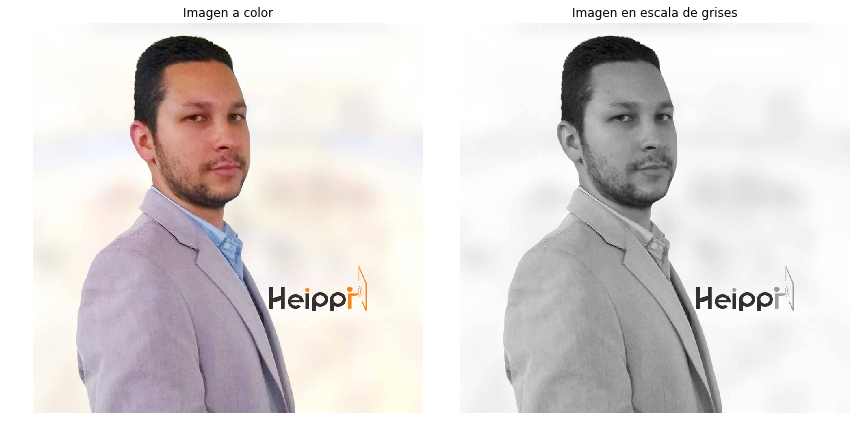

In [46]:
# Imagen a color.
img_color = cv2.imread('images/miguel_celis.jpg', cv2.IMREAD_COLOR)
print("La resolución de la imagen es {0}".format(img_color.shape))

# Transformar imagen BGR a RGB.
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Cargar una imagen a escala de grises.
img_gris = cv2.imread('images/miguel_celis.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.title('Imagen a color')
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(img_gris, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off');

plt.tight_layout()

## 2. Manipulación de imágenes

### Rotación

(-0.5, 959.5, 959.5, -0.5)

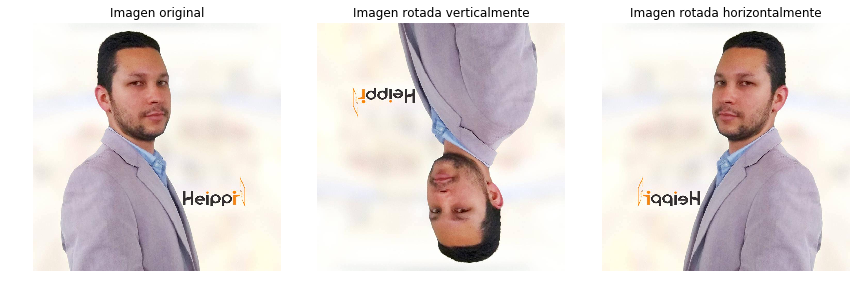

In [43]:
plt.figure(figsize=(12, 12))

#Imagen original.
plt.subplot(1,3,1)
plt.imshow(img_color)
plt.title('Imagen original')
plt.axis('off')

# Rotación vertical.
img_color_flip_vert = cv2.flip(img_color, -1)
plt.subplot(1, 3, 2)
plt.imshow(img_color_flip_vert)
plt.title('Imagen rotada verticalmente')
plt.axis('off')
plt.tight_layout()

# Rotación horizontal.
img_color_flip_horz = cv2.flip(img_color, 1)
plt.subplot(1, 3, 3)
plt.imshow(img_color_flip_horz)
plt.title('Imagen rotada horizontalmente')
plt.axis('off')

### Negativo de una imagen

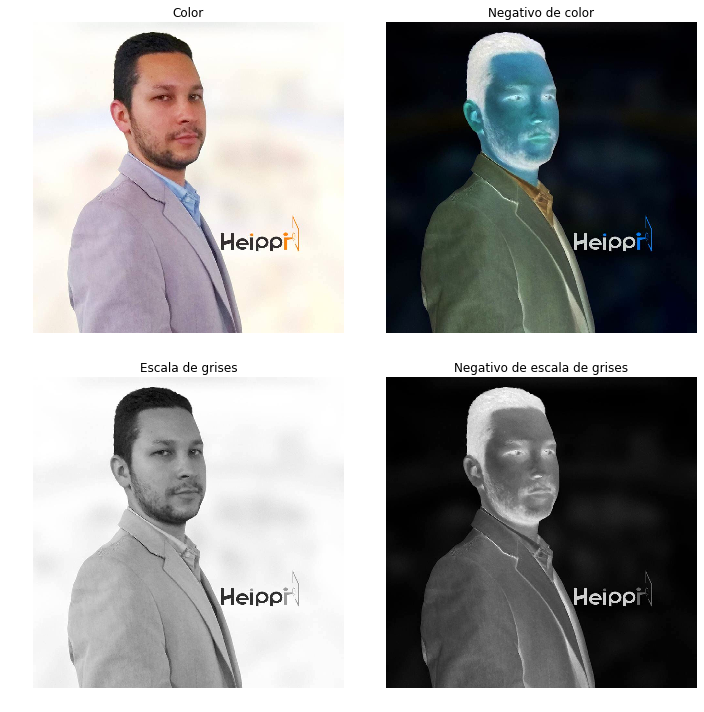

In [49]:
img = cv2.cvtColor(cv2.imread('images/miguel_celis.jpg', cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
img_neg = 255 - img
img_gris = cv2.imread('images/miguel_celis.jpg', cv2.IMREAD_GRAYSCALE)
img_gris_neg = 255 - img_gris

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Color')
plt.axis('off');

img_out = cv2.edgePreservingFilter(img)
plt.subplot(2, 2, 2)
plt.imshow(img_neg, cmap='gray')
plt.title('Negativo de color')
plt.axis('off');

img_out = cv2.detailEnhance(img);
plt.subplot(2, 2, 3)
plt.imshow(img_gris, cmap='gray')
plt.title('Escala de grises')
plt.axis('off');

cv2.stylization(img,img_out);
plt.subplot(2, 2, 4)
plt.imshow(img_gris_neg, cmap='gray')
plt.title('Negativo de escala de grises')
plt.axis('off');

plt.tight_layout()

## 3. Operaciones orientadas al píxel

### Pantalla verde

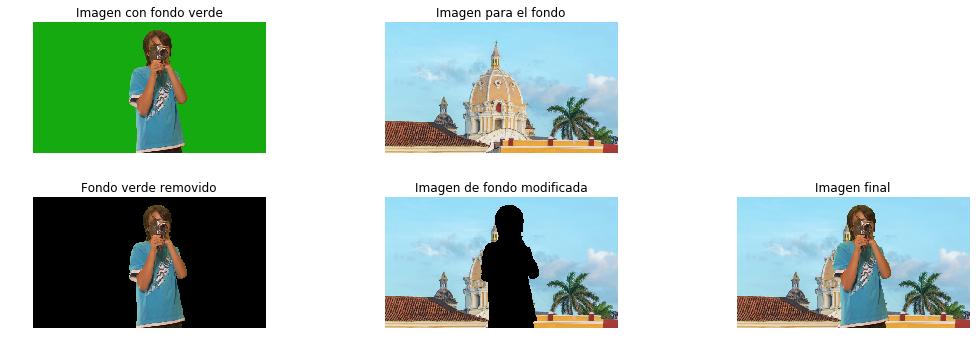

In [76]:
img = cv2.imread('images/green_screen_2.jpg')
img_bkg = cv2.imread('images/colombia_city_2.jpg')

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_bkg = cv2.cvtColor(img_bkg, cv2.COLOR_BGR2HSV)

lower_green, upper_green = np.array([50, 50, 120]), np.array([70, 255, 255]) 
green_mask = cv2.inRange(img_hsv, lower_green, upper_green) #

img_fg = cv2.bitwise_and(img_hsv, img_hsv, mask= 255 - green_mask)
img_bg = cv2.bitwise_and(img_bkg, img_bkg, mask = green_mask)

img_out = cv2.add(img_fg, img_bg)

plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))
plt.title('Imagen con fondo verde'); plt.axis('off');

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(img_bkg, cv2.COLOR_HSV2RGB))
plt.title('Imagen para el fondo'); plt.axis('off');

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(img_fg, cv2.COLOR_HSV2RGB))
plt.title('Fondo verde removido'); plt.axis('off');

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(img_bg, cv2.COLOR_HSV2RGB))
plt.title('Imagen de fondo modificada'); plt.axis('off');

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_HSV2RGB))
plt.title('Imagen final'); plt.axis('off');

plt.tight_layout()

### Ruido de sal y pimienta

In [6]:
img = cv2.imread('images/saltpepper.png', cv2.IMREAD_GRAYSCALE)

def salt_pepper(img,k_size):    
    img_filt=cv2.medianBlur(img,k_size)
    plt.figure(figsize=(13, 13))
    plt.subplot(1, 2, 1)
    plt.imshow(img,cmap ='gray')
    plt.title('Imagen original')
    plt.axis('off');

    plt.subplot(1, 2, 2)
    plt.imshow(img_filt,cmap ='gray')
    plt.title('Imagen filtrada')
    plt.axis('off');


filter_slider = widgets.IntSlider(min=1, max=35, value=5, step=2, description='kernel')
interact(salt_pepper, img=fixed(img), k_size=filter_slider);

interactive(children=(IntSlider(value=5, description='kernel', max=35, min=1, step=2), Output()), _dom_classes…

### Renderizado fotorrealista

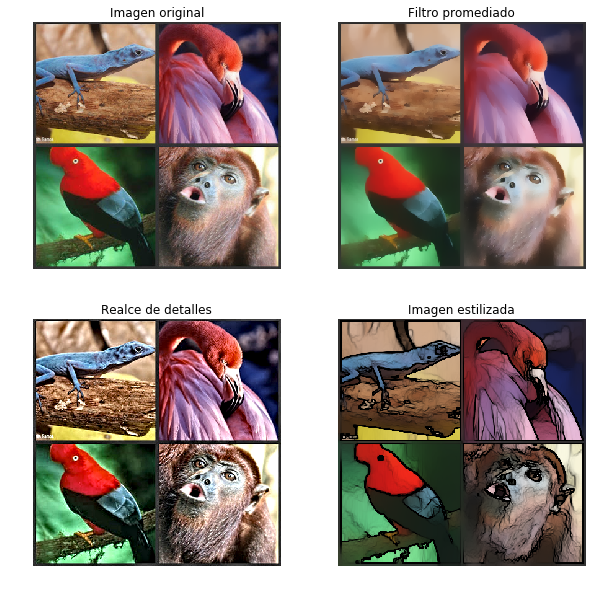

In [7]:
img = cv2.imread('images/animals.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img); plt.title('Imagen original'); plt.axis('off')

img_out = cv2.edgePreservingFilter(img)
plt.subplot(2, 2, 2)
plt.imshow(img_out); plt.title('Filtro promediado'); plt.axis('off');

img_out = cv2.detailEnhance(img);
plt.subplot(2, 2, 3)
plt.imshow(img_out); plt.title('Realce de detalles'); plt.axis('off');

cv2.stylization(img,img_out);
plt.subplot(2, 2, 4)
plt.imshow(img_out); plt.title('Imagen estilizada'); plt.axis('off');


## 4. Identificación de características

### Detección de bordes

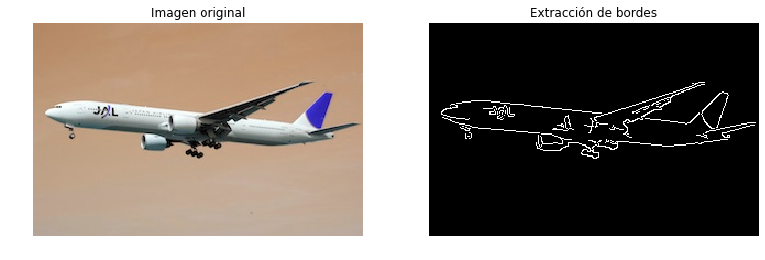

In [8]:
img = cv2.imread('images/airplane.jpg')

plt.figure(figsize=(13, 13))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Imagen original');

img_edges = cv2.Canny(img, 200, 500)
plt.subplot(1, 2, 2)
plt.imshow(img_edges, cmap='gray'); plt.axis('off'); plt.title('Extracción de bordes');

### Correlación de imágenes

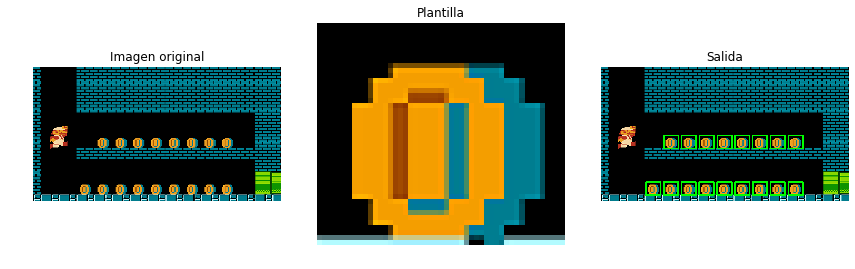

In [18]:
img = cv2.imread('images/mario.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

template = cv2.imread('images/coin.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
height, width, _ = template.shape

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.imshow(img) 
plt.title('Imagen original')
plt.axis('off');

plt.subplot(1,3,2)
plt.imshow(template) 
plt.title('Plantilla')
plt.axis('off');

res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
locations = np.where(res >= 0.8)
for point in zip(locations[1], locations[0]):
    cv2.rectangle(img, point, (point[0] + width, point[1] + height), (0, 255, 0), 2)

plt.subplot(1,3,3)
plt.imshow(img) 
plt.title('Salida')
plt.axis('off');

plt.tight_layout()

## Detección de rostros

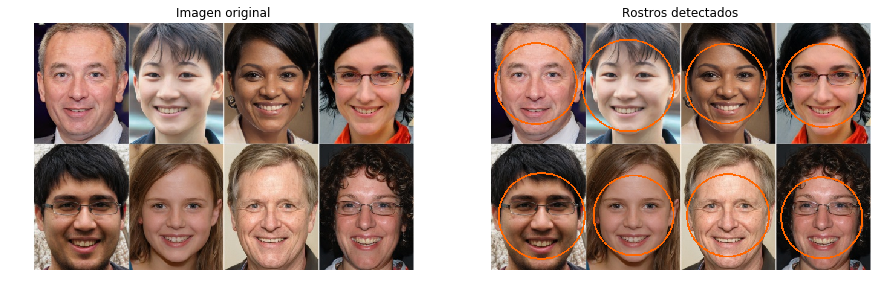

In [11]:
plt.figure(figsize=(15, 15))
img = cv2.imread('images/rostros.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Imagen original')



classifier_path = 'classifiers/haarcascade_frontalface_alt.xml'
face_cascade = cv2.CascadeClassifier(classifier_path)

faces = face_cascade.detectMultiScale(img,
                                      scaleFactor=1.1,
                                      minNeighbors=5,
                                      minSize=(30, 30))
for face_coords in faces:
    x_point, y_point, width, height = face_coords    
    radius = int(width / 2)
    center = (x_point + radius, y_point + radius)
    cv2.circle(img, center,  radius, (255, 102, 0), 2)

plt.subplot(1, 2, 2)
plt.imshow(img)
plt.axis('off')
plt.title('Rostros detectados');